In [1]:
points = [(2,0), (6,0), (6,2), (8,2), (8,5), (7,5), (7,7), (5,7), (5,9), (3,9), (3,7), (0,7), (0,2), (2,2) ]

In [97]:
def makeEdges(points):
    edges = []
    for i in range(len(points)):
        edges.append([points[i], points[(i+1)%len(points)]])
    return edges

def proj(x, y, p):
    x1, y1 = x[0], x[1]
    x2, y2 = y[0], y[1]
    xp, yp = p[0], p[1]
    x12 = x2 - x1
    y12 = y2 - y1
    dotp = x12 * (xp - x1) + y12 * (yp - y1)
    dot12 = x12 * x12 + y12 * y12
    if dot12:
        coeff = dotp / dot12
        lx = x1 + x12 * coeff
        ly = y1 + y12 * coeff
        return (int(lx), int(ly))
    else:
        return False

def is_point_in_line(a, b, c):
    if (a[0] == b[0] and c[0] == a[0]):
        if (a[1] <= c[1] <= b[1]):
            return True
        else:
            return False
    elif (a[1] == b[1] and c[1] == a[1]):
        if (a[0] <= c[0] <= b[0]):
            return True
        else:
            return False
    return False

def is_in_same_axis(a, b):
    if (a[0] == b[0] or a[1] == b[1]):
        return True
    return False

new_points = []
edges = makeEdges(points)
for p in points:
    for edge in edges:
        proj_point = proj(edge[0], edge[1], p)
        if is_point_in_line(edge[0], edge[1], proj_point):
            cut = [p, proj_point]
            if cut not in edges:
                new_points.append([p, proj_point])
print(edges)

[[(2, 0), (6, 0)], [(6, 0), (6, 2)], [(6, 2), (8, 2)], [(8, 2), (8, 5)], [(8, 5), (7, 5)], [(7, 5), (7, 7)], [(7, 7), (5, 7)], [(5, 7), (5, 9)], [(5, 9), (3, 9)], [(3, 9), (3, 7)], [(3, 7), (0, 7)], [(0, 7), (0, 2)], [(0, 2), (2, 2)], [(2, 2), (2, 0)]]


<Figure size 432x288 with 0 Axes>

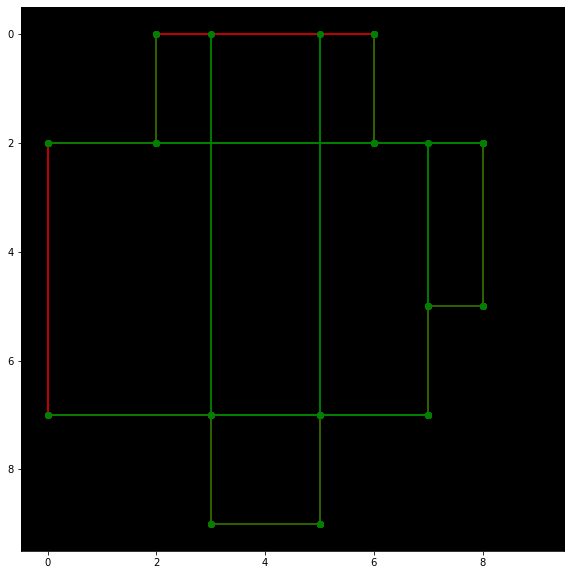

In [98]:
import matplotlib.pyplot as plt
import numpy as np

img = np.zeros((10,10,3), np.uint8)

plt.clf()

fig = plt.figure(figsize=(10, 10))

x_values = []
y_values = []

for index in range(len(points)):
    x =  points[index]
    if(index >= len(points)-1):
        y = points[0]
    else:
        y = points[index+1]

    x_values = [x[0], y[0]]
    y_values = [x[1], y[1]]
    plt.plot(x_values, y_values, color="r", marker="o", linestyle="-")

x_values = []
y_values = []

for line in new_points:
    x_values = [line[0][0], line[1][0]]
    y_values = [line[0][1], line[1][1]]
    plt.plot(x_values, y_values, color="g", marker="o", linestyle="-")

plt.imshow(img)